In [76]:
import pandas as pd
data = pd.read_csv("C:/Users/kpoliak/OneDrive - Deloitte (O365D)/Desktop\hackathon\ch6\hackathon IKEM 11-2022 CKD data/LabsALL 2015-2022.csv", sep=';')

C:\Users\kpoliak\AppData\Local\Temp/ipykernel_34340/3427690001.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/kpoliak/OneDrive - Deloitte (O365D)/Desktop\hackathon\ch6\hackathon IKEM 11-2022 CKD data/LabsALL 2015-2022.csv", sep=';')


In [77]:
import datetime

def part_of_day(x:datetime.datetime):
    if x.hour > 0 and x.hour <= 4:
        return 0
    elif x.hour > 4 and x.hour <= 8:
        return 1
    elif x.hour > 8 and x.hour <= 12:
        return 2
    elif x.hour > 12 and x.hour <= 16:
        return 3
    elif x.hour > 16 and x.hour <= 20:
        return 4
    else:
        return 5

data['EntryDate'] = pd.to_datetime(data['EntryDate'], infer_datetime_format=True)
data['EntryTime'] = pd.to_datetime(data['EntryTime'], infer_datetime_format=True)
data['PartOfDay'] = data['EntryTime'].apply(lambda x: part_of_day(x))
data.head()

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit,PartOfDay
0,324729,27200171,154214712,2022-09-30,1899-12-30 07:42:00,SZU-HEP_0004__R,NaN,HBsAg konfirmace,NaN,externě,NaN,NaN,NaN,1
1,324729,27200171,154214720,2022-09-30,1899-12-30 07:42:00,ZU-OKM_0024__R,NaN,Rotaviry + Noroviry stolice,NaN,odběr,NaN,NaN,NaN,1
2,324729,1453155,18244355,2015-04-16,1899-12-30 07:31:00,NaN,3482.0,s_vápník celk.,2.37,NaN,2.55,2.15,mmol/l,1
3,324729,1453155,18244356,2015-04-16,1899-12-30 07:31:00,NaN,2618.0,s_fosfor,1.32,NaN,1.23,0.71,mmol/l,1
4,324729,1453155,18244357,2015-04-16,1899-12-30 07:31:00,NaN,3940.0,s_hořčík,0.75,NaN,0.94,0.71,mmol/l,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8679298 entries, 0 to 8679297
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient      int64         
 1   Report       int64         
 2   ID           int64         
 3   EntryDate    datetime64[ns]
 4   EntryTime    datetime64[ns]
 5   Code         object        
 6   NCLP         float64       
 7   Analyte      object        
 8   ValueNumber  object        
 9   ValueText    object        
 10  RefHigh      object        
 11  RefLow       object        
 12  Unit         object        
 13  PartOfDay    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 927.0+ MB


In [19]:
nclp = data[~data['NCLP'].isna()]
nclp.shape

(8105774, 13)

In [23]:
code = data[~data['Code'].isna()]
code_patients = code.Patient.tolist()
nclp_patients = nclp.Patient.tolist()

In [27]:
data = data[(~data['NCLP'].isna())|(~data['Code'].isna())|(~data['Analyte'].isna())]


(8679295, 13)

In [28]:
data.head()

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit
0,324729,27200171,154214712,30.09.2022,30.12.1899 7:42:00,SZU-HEP_0004__R,NaN,HBsAg konfirmace,NaN,externě,NaN,NaN,NaN
1,324729,27200171,154214720,30.09.2022,30.12.1899 7:42:00,ZU-OKM_0024__R,NaN,Rotaviry + Noroviry stolice,NaN,odběr,NaN,NaN,NaN
2,324729,1453155,18244355,16.04.2015,30.12.1899 7:31:00,NaN,3482.0,s_vápník celk.,2.37,NaN,2.55,2.15,mmol/l
3,324729,1453155,18244356,16.04.2015,30.12.1899 7:31:00,NaN,2618.0,s_fosfor,1.32,NaN,1.23,0.71,mmol/l
4,324729,1453155,18244357,16.04.2015,30.12.1899 7:31:00,NaN,3940.0,s_hořčík,0.75,NaN,0.94,0.71,mmol/l


In [31]:
data[data['Patient'] == 324729].head(20)

,Patient,Report,ID,EntryDate,EntryTime,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit
0,324729,27200171,154214712,30.09.2022,30.12.1899 7:42:00,SZU-HEP_0004__R,NaN,HBsAg konfirmace,NaN,externě,NaN,NaN,NaN
1,324729,27200171,154214720,30.09.2022,30.12.1899 7:42:00,ZU-OKM_0024__R,NaN,Rotaviry + Noroviry stolice,NaN,odběr,NaN,NaN,NaN
2,324729,1453155,18244355,16.04.2015,30.12.1899 7:31:00,NaN,3482.0,s_vápník celk.,2.37,NaN,2.55,2.15,mmol/l
3,324729,1453155,18244356,16.04.2015,30.12.1899 7:31:00,NaN,2618.0,s_fosfor,1.32,NaN,1.23,0.71,mmol/l
4,324729,1453155,18244357,16.04.2015,30.12.1899 7:31:00,NaN,3940.0,s_hořčík,0.75,NaN,0.94,0.71,mmol/l
5,324729,1453155,18244358,16.04.2015,30.12.1899 7:31:00,NaN,8574.0,s_kreatinin,138.9,NaN,104.0,64.0,umol/l
6,324729,1453155,18244359,16.04.2015,30.12.1899 7:31:00,NaN,1896.0,p_glukóza (NaF),10.36,NaN,5.59,3.60,mmol/l
7,324729,1453155,18244360,16.04.2015,30.12.1899 7:31:00,NaN,1350.0,s_cholesterol,3.5,NaN,5.0,2.9,mmol/l
8,324729,1453155,18244361,16.04.2015,30.12.1899 7:31:00,NaN,12374.0,s_TAG,1.77,NaN,1.69,0.50,mmol/l
9,324729,1453155,18244362,16.04.2015,30.12.1899 7:31:00,NaN,2036.0,s_HDL cholest.,0.93,NaN,2.1,1.00,mmol/l


In [32]:
unit_expl = data.groupby(by=['NCLP'])['Unit'].nunique()

In [48]:
data[(data['ValueNumber'].isna())&(data['ValueText'].isna())].shape

(17, 13)

In [ ]:
bullshit = ['externě', "odběr", ""]
useful = ['normal', '']
mapper = {
    "bullshit" : ['externě', "odběr", "ordinace", "nelze hodnotit", "+-", "koncept", "hemolýza", "viz komentář", "četné", "neúplné informace na žádance", "viz neshody", "záplava", "reaktivní", "málo materiálu", "sraženo", ""],
    "normal": ['normální nález', "Normal"],
    "negative": ['negativní', 'nedetekovano', "NEG", "Séronegativní.", "virus nedetekov.", "negativni", "neindikováno", "neg"],
    "rare": ['ojediněle'],
    "present": ['přítomen', 'přítomny', "pritomen", "pritomny", "cetne"],
    "positive": ["+     pozitivní", "pozitivní", "++    pozitivní", "+++   pozitivní", "++++  pozitivní", "POZITIV.", "silně pozitivní", "Pozitivní"]
}

"""
OK if includes: <,>, number, '+' pred i po cisle,
"""

In [66]:
l = ['externě', "odběr", "normální nález", "negativní", "ojediněle", "přítomen", "normal"]
other = ['<', '>']
tmp = data[(data['ValueNumber'].isna()) & (~data['ValueText'].isna()) & (any(val in data['ValueText'] for val in l))].head()

In [80]:
allowed_vals = ["normální nález", "negativní", "ojediněle", "přítomen", "normal"]
forbiden_vals = ['externě', "odběr"]


tmp = data[(data['ValueNumber'].isna()) & (~data['ValueText'].isna()) & (data['ValueText'].str.len() < 30) & (~data['ValueText'].isin(l))]
tmp = tmp['ValueText'].value_counts()
# i = tmp.index.value
tmp 
tmp.to_csv("ValText.csv")

In [6]:
import pandas as pd

d = pd.read_pickle("./data/preprocessed/nclp.pkl")
d.head()

,Patient,Report,ID,EntryDate,Code,NCLP,Analyte,ValueNumber,ValueText,RefHigh,RefLow,Unit,POD,NCLP_E,result
2,324729,1453155,18244355,2015-04-16,NaN,3482.0,s_vápník celk.,2.37,NaN,2.55,2.15,mmol/l,1,52672.0,0
3,324729,1453155,18244356,2015-04-16,NaN,2618.0,s_fosfor,1.32,NaN,1.23,0.71,mmol/l,1,2618.0,1
4,324729,1453155,18244357,2015-04-16,NaN,3940.0,s_hořčík,0.75,NaN,0.94,0.71,mmol/l,1,3940.0,0
5,324729,1453155,18244358,2015-04-16,NaN,8574.0,s_kreatinin,138.90,NaN,104.00,64.00,umol/l,1,8574.0,1
6,324729,1453155,18244359,2015-04-16,NaN,1896.0,p_glukóza (NaF),10.36,NaN,5.59,3.60,mmol/l,1,51802.0,1


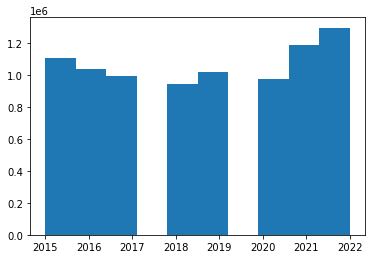

In [41]:
# tmp = d[d['Patient'] == 209536]
# tmp.groupby(by=['Patient','EntryDate','Report']).count()
y = d['EntryDate'].apply(lambda x: x.year)
import matplotlib.pyplot as plt	
plt.hist(y)
plt.show()

In [36]:
diag = pd.read_pickle("./data/clean/diagnoses.pkl")
# diag[diag['patient_id'] == 209536].head(10)


In [57]:
pd.options.display.max_columns = 50
diag[diag['patient_id'] == 13096].head(30)

,patient_id,date,main_code,main_description,other_code,other_description,is_ckd,is_dia,ckd_stadium,min_date,max_date,cnt_rows,cnt_visits,is_ckd_patient,is_dia_patient,date_range,min_ckd_date,min_dia_date,is_ckd_cum,is_dia_cum,sex,age_2022,age,date_fom,fom,bmi,year
116610,13096,2015-06-16,I47.1,Parox. síň. tachykardie,I35.2,Stenóza aortální (chlopně) s insuficiencí stře...,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,0,0,F,92.1,84.647945,2015-06-01,NaT,NaN,2015
116611,13096,2015-06-16,I47.1,Parox. síň. tachykardie,Z95.0,Přítomnost kardiostimulátoru,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,0,0,F,92.1,84.647945,2015-06-01,NaT,NaN,2015
116612,13096,2015-06-16,I47.1,Parox. síň. tachykardie,I35.2,Stenóza aortální (chlopně) s insuficiencí hemo...,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,0,0,F,92.1,84.647945,2015-06-01,NaT,NaN,2015
116613,13096,2015-12-15,I47.1,"Parox. síň. tachykardie, t.č. sinusový resp. s...",I35.2,Stenóza aortální (chlopně) s insuficiencí hemo...,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,0,0,F,92.1,85.146575,2015-12-01,NaT,NaN,2015
116614,13096,2015-12-15,I47.1,"Parox. síň. tachykardie, t.č. sinusový resp. s...",Z95.0,Přítomnost elektronického kardiostimulátoru,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,0,0,F,92.1,85.146575,2015-12-01,NaT,NaN,2015
116615,13096,2022-01-04,I48.2,"Permanentní fibrilace síní, CHA2DS2VASc:5, riv...",NaN,"Stp. TAVI transfemorálně, lehká paraprotézová ...",0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,1,1,F,92.1,91.206849,2022-01-01,NaT,NaN,2022
116616,13096,2022-01-04,I48.2,"Permanentní fibrilace síní, CHA2DS2VASc:5, riv...",Z95.0,"St.p. impl. 2D PM, dependentní na stimulaci",0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,1,1,F,92.1,91.206849,2022-01-01,NaT,NaN,2022
116617,13096,2022-01-04,I48.2,"Permanentní fibrilace síní, CHA2DS2VASc:5, riv...",I36.1,Význ. Tri regurgitace,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,1,1,F,92.1,91.206849,2022-01-01,NaT,NaN,2022
116618,13096,2022-01-04,I48.2,"Permanentní fibrilace síní, CHA2DS2VASc:5, riv...",I10,Esenciální (primární) hypertenze komp.,0,0,NaN,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,1,1,F,92.1,91.206849,2022-01-01,NaT,NaN,2022
116619,13096,2022-01-04,I48.2,"Permanentní fibrilace síní, CHA2DS2VASc:5, riv...",N18.3,"Chronické onemocnění ledvin, stadium 3",1,0,3,2015-06-16,2022-01-04,10,3,1,0,2394 days,2022-01-04,NaT,1,1,F,92.1,91.206849,2022-01-01,NaT,NaN,2022


In [53]:
diag['year'] = diag['date'].apply(lambda x: x.year)
agg_last = ['age_2022','sex', 'is_dia', 'is_ckd']
agg_median = ['bmi']
data = diag.groupby('patient_id', as_index=False).agg(
    {
        **{col: "last" for col in agg_last},
        **{col: "median" for col in agg_median}
    }
)

In [55]:
data[data['is_ckd']==1]

,patient_id,age_2022,sex,is_dia,is_ckd,bmi
731,10721,68.1,M,1,1,31.50
801,13096,92.1,F,0,1,NaN
818,13787,89.3,M,0,1,29.30
992,16447,80.3,M,0,1,25.80
1120,17774,77.0,M,1,1,32.10
...,...,...,...,...,...,...
14595,1240589,84.8,M,0,1,26.40
14777,1242545,70.1,M,0,1,29.30
14837,1243357,89.5,M,0,1,NaN
15282,1249941,85.5,M,0,1,24.90


In [88]:
d = pd.read_pickle('src/tmp.pkl')

In [89]:
tmp = d[~d['bmi'].isna()]

In [90]:
tmp.head()

,patient_id,NCLP,ValueNumber,POD,NCLP_E,result,age_2022,sex,is_dia,is_ckd,bmi
0,324729,3482.0,2.37,1,52672.0,0,71.0,M,1,0,29.7
1,324729,2618.0,1.32,1,2618.0,1,71.0,M,1,0,29.7
2,324729,3940.0,0.75,1,3940.0,0,71.0,M,1,0,29.7
3,324729,8574.0,138.90,1,8574.0,1,71.0,M,1,0,29.7
4,324729,1896.0,10.36,1,51802.0,1,71.0,M,1,0,29.7


In [79]:
pat = tmp.patient_id.unique().tolist()
relevant_tests = tmp.groupby(['NCLP_E']).apply(lambda grp: len(grp['patient_id'].unique())/len(pat)*100).sort_values(ascending=False)


In [101]:
tt = relevant_tests.index.values
tt = [str(x) for x in tt]
tt
# t = [8574.0, 13808.0,  2099.0, 12271.0, 12273.0,  2419.0,  1991.0, 4726.0, 18895.0,  2688.0]

['8574.0',
 '13808.0',
 '2099.0',
 '12271.0',
 '12273.0',
 '2419.0',
 '1991.0',
 '4726.0',
 '18895.0',
 '2688.0',
 '4769.0',
 '1675.0',
 '16263.0',
 '3086.0',
 '17339.0',
 '5254.0',
 '582.0',
 '5272.0',
 '921.0',
 '17341.0',
 '1961.0',
 '52681.0',
 '543.0',
 '1350.0',
 '13825.0',
 '12374.0',
 '2036.0',
 '12278.0',
 '17357.0',
 '3380.0',
 '13821.0',
 '12471.0',
 '12478.0',
 '12483.0',
 '12460.0',
 '12449.0',
 '12347.0',
 '12369.0',
 '12348.0',
 '12367.0',
 '12365.0',
 '18029.0',
 '18027.0',
 '3078.0',
 '19764.0',
 '5187.0',
 '20045.0',
 '15194.0',
 '12356.0',
 '3280.0',
 '3378.0',
 '3434.0',
 '3414.0',
 '3371.0',
 '3399.0',
 '3388.0',
 '11280.0',
 '3271.0',
 '4989.0',
 '5143.0',
 '3437.0',
 '9191.0',
 '12334.0',
 '3355.0',
 '3297.0',
 '14010.0',
 '15172.0',
 '51802.0',
 '20044.0',
 '1522.0',
 '13820.0',
 '19599.0',
 '52672.0',
 '3571.0',
 '3656.0',
 '16551.0',
 '16097.0',
 '3649.0',
 '12333.0',
 '14011.0',
 '3386.0',
 '14013.0',
 '9189.0',
 '8528.0',
 '15160.0',
 '9322.0',
 '12355.0',
 

In [99]:
# tmp = tmp[tmp['NCLP_E'].isin(t)]



(1189274, 11)
(1189274, 20)


In [96]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(tmp['NCLP_E'])
# Drop column B as it is now encoded
df = tmp.drop('NCLP_E',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()

,patient_id,NCLP,ValueNumber,POD,result,age_2022,sex,is_dia,is_ckd,bmi,1991.0,2099.0,2419.0,2688.0,4726.0,8574.0,12271.0,12273.0,13808.0,18895.0
3,324729,8574.0,138.9,1,1,71.0,M,1,0,29.7,0,0,0,0,0,1,0,0,0,0
39,324729,8574.0,152.7,1,1,71.0,M,1,0,29.7,0,0,0,0,0,1,0,0,0,0
62,324729,8574.0,145.1,1,1,71.0,M,1,0,29.7,0,0,0,0,0,1,0,0,0,0
102,324729,8574.0,131.1,1,1,71.0,M,1,0,29.7,0,0,0,0,0,1,0,0,0,0
365,324729,8574.0,123.4,1,1,71.0,M,1,0,29.7,0,0,0,0,0,1,0,0,0,0


In [2]:
# init setup
import numpy as np
import pandas as pd
data = pd.read_pickle("./data/clean/full_data.pkl")
data.drop(columns=['patient_id', 'NCLP'], inplace=True)
categorical_cols = ['POD', 'result', 'sex', 'is_dia']
ohe_cols = data.columns.values
ohe_cols = [x for x in ohe_cols if '.' in x]
categorical_cols = categorical_cols + ohe_cols
data['sex'] = np.where(data['sex'] == 'M', 1, 0)
for col in categorical_cols:
    data[col] = pd.Categorical(data[col])


In [6]:
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    KFold,
)
from xgboost import XGBClassifier, XGBModel
from typing import Tuple, Dict, Any


In [16]:
from sklearn.metrics import (
    roc_auc_score,
    mean_squared_error,
    classification_report,
)

def model_evaluation(
        y_true: pd.DataFrame,
        y_pred: pd.DataFrame,
    ) -> Dict[str, Any]:
        """
        Compute evaluation metrics [RMSE, ROC-AUC Score] and classification report.
        :param y_true: array-like; ground truth labels
        :param y_true: array-like; estimated target values
        :return: Dictionary summarizing eval metrics
        """
        rmse = mean_squared_error(y_true=y_true, y_pred=y_pred)
        # if (
        #     len(np.where(y_true == 1)[0]) == 0
        #     or len(np.where(y_true == 1)[1]) == 0
        # ):
        #     roc = 0
        # else:
        roc = roc_auc_score(y_true=y_true, y_score=y_pred)
        report: Dict[str, Any] = classification_report(
            y_true=y_true,
            y_pred=y_pred,
            output_dict=True,
        )
        report.pop("macro avg")
        report.pop("weighted avg")
        report["roc_auc"] = roc
        report["rmse"] = rmse
        return report


In [4]:
def cv_grid_search(
        estimator: XGBModel,
        x: pd.DataFrame,
        y: pd.DataFrame,
    ) -> Tuple[XGBModel, str, float]:
        """
        Execute grid search with cross validation to find optimal parameters.
        :param estimator: XGBoost model (classifier, regressor)
        :param x: Dataframe; input data
        :param y: Dataframe; output data
        :return:
            - Trained XGBoost model
            - chosen scoring method
            - best score
        """
        # Get parameters from config file and set up the cross-validation
        parameters_grid_search = {
            "max_depth" : [3, 4, 5],
            "gamma" : [0.25, 0.5, 1.0, 1.5, 2.0, 5.0],
            "learning_rate" : [0.01, 0.1, 0.2, 0.5],
            "n_estimators" : [25, 50, 75, 100, 150],
            "colsample_bytree" : [0.6, 0.8, 1.0],
            "subsample" : [0.6, 0.8, 1.0],
            "min_child_weight" : [1, 5, 10]
        }

        scoring = 'roc_auc'
        cv = StratifiedKFold(
            n_splits=10,
            shuffle=True,
            random_state=42,
        )

        grid_search = RandomizedSearchCV(
            estimator=estimator,
            param_distributions=parameters_grid_search,
            n_iter=1,
            n_jobs=1,
            cv=cv,
            verbose=3,
            scoring=scoring,
            random_state=42,
        )
        # Run the grid search
        # y_name = y.columns.tolist()[0]
        # y_arr = y.loc[:, y_name].values
        grid_search.fit(x, y)
        # Extract results
        best_model_params = grid_search.best_params_
        print(best_model_params)
        print(f"GridSearchCV parameters found: {grid_search.best_params_}")
        best_score = grid_search.best_score_
        print(f"GridSearchCV best score [{scoring}]: {best_score}")
        return grid_search.best_estimator_, scoring, best_score


In [5]:
def get_probability(
        model: XGBModel,
        pred_df: pd.DataFrame,
    ) -> np.ndarray:
        """
        Get probability of label == 1.
        :param model: XGBoost model
        :param pred_df: Dataframe to predict for
        :return: array of probabilities
        """
        classes = model.classes_
        ind = np.where(classes == 1)[0][0]
        probability_val = model.predict_proba(pred_df)
        return probability_val[:, ind]

def predict(
        model: XGBModel,
        data: pd.DataFrame,
    ) -> pd.DataFrame:
        """
        Get XGBoost model prediction.
        :param model: Trained XGBoost model
        :param data: dataframe; Data to evaluate predictions on
        :return: Dataframe enhanced with predictions
        """
        data = data.copy()
        predictions = get_probability(model=model, pred_df=data)
        predictions_df = pd.DataFrame(
            data={"ckd_estimate" : predictions},
        )
        return predictions_df
    
from sklearn.model_selection import train_test_split

X = data.drop(['is_ckd'],axis=1).values   # independant features
y = data['is_ckd'].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize model
params = {
    "objective" : 'reg:logistic',
    "max_depth" : 5,
    "alpha" : 10,
    "n_estimators" : 10,
    "colsample_bytree" : 0.3,
    "learning_rate" : 0.1,
    "random_state" : 42
}
model = XGBClassifier(**params)
# Train model
model, scoring, best_score = cv_grid_search(
    estimator=model,
    x=X_train,
    y=y_train,
)
# Get predictions for evaluation
eval_preds = model.predict(X=X_test)
# Get prediction for prediction dataset
train_prediction = predict(model=model, data=X_train)
test_prediction = predict(model=model, data=X_test)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.975 total time=   6.2s
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.970 total time=   6.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.976 total time=   8.0s
[CV 4/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.975 total time=   7.8s
[CV 5/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.975 total time=   7.8s
[CV 6/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, su

In [17]:
report = model_evaluation(y_true=y_test, y_pred=pd.DataFrame(eval_preds))
# np.where(y_test == 1)

In [19]:
def feature_importance(
    model: XGBModel,
    data: pd.DataFrame,
) -> Dict[str, float]:
    """
    Get model feature importance.
    :param model: XGBoost model
    :param data: Dataframe; input data
    :return: Feature gain
    """
    importance_vals = model.feature_importances_
    features = data.columns
    importance = dict(zip(features, importance_vals))
    sorted_importance = {
        k: v
        for k, v in sorted(
            importance.items(),
            key=lambda item: item[1],  # type: ignore[no-any-return]
            reverse=True,
        )
    }
    return sorted_importance

importance = feature_importance(model=model, data=X_train)

importance


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [22]:
model.feature_importances_
# X_train

array([0.09461852, 0.01288807, 0.24769796, 0.1216143 , 0.0987212 ,
       0.10460871, 0.11109537, 0.11944769, 0.08930814, 0.        ],
      dtype=float32)

In [1]:
import pandas as pd
df = pd.read_pickle("./data/clean/full_data_t10-20.pkl")
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("full_data.html")


Summarize dataset:  72%|███████▏  | 21/29 [00:05<00:01,  4.03it/s, Calculate kendall correlation] c:\Users\kpoliak\Anaconda3\envs\attrition\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.81it/s]
